In [279]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(context = "notebook", style = "darkgrid", palette = "colorblind", font = "sans-serif", font_scale = 1.5)
import matplotlib.pyplot as plt 
import matplotlib.dates as dates #for better formatting
import datetime as dt
#from pandas.plotting import andrews_curves

In [280]:
df1 = pd.read_csv('Data/marketplace.csv', delimiter=',', nrows = 1000)
df1 = df1.drop_duplicates() # if there are duplicate rows
print("The table has shape: {} rows and {} columns".format(*df1.shape))
nRow, nCol = df1.shape
display(df1.head()) 

The table has shape: 1000 rows and 16 columns


,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2,3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
3,4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4,4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


In [272]:
# Getting an idea of what the data structure, field types, nulls etc
display(df1.info())   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1000 non-null   object 
 1   sku_name        1000 non-null   object 
 2   product_id      1000 non-null   object 
 3   merchant_code   999 non-null    float64
 4   merchant_badge  1000 non-null   object 
 5   product_type    1000 non-null   object 
 6   merchant_city   1000 non-null   object 
 7   cod             1000 non-null   bool   
 8   price           1000 non-null   int64  
 9   stock           1000 non-null   int64  
 10  daily_gmv       1000 non-null   int64  
 11  daily_sold      1000 non-null   int64  
 12  daily_view      1000 non-null   int64  
 13  rating          1000 non-null   int64  
 14  total_review    1000 non-null   int64  
 15  total_sold      1000 non-null   int64  
dtypes: bool(1), float64(1), int64(8), object(6)
memory usage: 126.0+ KB


None

### Data description
Below is the description of each field. 
- `date`: The date which a product of a merchant being recorded in one day
- `sku_name`: The name of the product appear in marketplace
- `product_id`: Product type recorded in ID
- `merchant_code`: Merchant shops symbollized by code
- `merchant_badge`: Type of merchant
- `product_type`: The product being sold in a certain merchant
- `merchant_city`: Origin city of merchant
- `cod`: Available cash payment when the product arrived
- `price`:Product pricing in the recorded date
- `stock` : Stock of product in the recorded date
- `daily_gmv`:  Daily gross merchandised value: Total value of merchandise sold over in the recorded date or in other words daily revenue (price x total_sold)
- `daily_sold`: Total quantity of merchandise/product being sold in the recorded date
- `daily_view`: Total view of a merchandise in the recorded date
- `rating`: Satisfaction of buyer for the merchandise been bought
- `total_review`: Total review by buyer who has bought the marchandise until the recorded date 
- `total_sold`: Total quantity of merchandise that have been sold in the recorded date

In [376]:
df1["total_gmv"] = df1.total_sold*df1.price
#df1["daily_revenue"] = df1.daily_sold*df1.price
df1['daily_converted'] = np.where((df1.daily_sold>0)&(df1.daily_view>0), True, False)
df1.loc[df1['daily_sold']==0, 'daily_gmv'] = 0
df1.date = pd.to_datetime(df1.date).dt.date
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1000 non-null   object 
 1   sku_name         1000 non-null   object 
 2   product_id       1000 non-null   object 
 3   merchant_code    999 non-null    float64
 4   merchant_badge   1000 non-null   object 
 5   product_type     1000 non-null   object 
 6   merchant_city    1000 non-null   object 
 7   cod              1000 non-null   bool   
 8   price            1000 non-null   int64  
 9   stock            1000 non-null   int64  
 10  daily_gmv        1000 non-null   int64  
 11  daily_sold       1000 non-null   int64  
 12  daily_view       1000 non-null   int64  
 13  rating           1000 non-null   int64  
 14  total_review     1000 non-null   int64  
 15  total_sold       1000 non-null   int64  
 16  daily_converted  1000 non-null   bool   
 17  total_gmv      

None

In [282]:
# statistics of numerical data
display(df1.describe())

,merchant_code,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,999.000000,1.000000e+03,1000.000000,1.000000e+03,1000.00000,1000.0000,1000.000000,1000.00000,1000.000000
mean,102.686687,3.995749e+06,613948.560000,-4.594820e+04,-0.01500,13.9660,98.288000,53.58400,89.896000
std,87.030233,2.800498e+06,486111.902086,6.568302e+06,2.80154,56.8895,4.178578,103.41341,184.506129
min,1.000000,7.200000e+05,1.000000,-1.300000e+08,-65.00000,0.0000,0.000000,0.00000,1.000000
25%,20.000000,2.050000e+06,83.500000,0.000000e+00,0.00000,1.0000,98.000000,4.00000,6.000000
50%,73.000000,3.149000e+06,999996.000000,0.000000e+00,0.00000,2.0000,100.000000,19.50000,33.000000
75%,177.000000,4.299000e+06,999999.000000,0.000000e+00,0.00000,6.0000,100.000000,53.00000,91.000000
max,289.000000,2.179000e+07,999999.000000,4.305000e+07,21.00000,1247.0000,100.000000,1021.00000,2621.000000


## Counts Per Column
Lets plot the distributions of columns which have greater than one and less than 80 unique categories or values. Lets see the trends in each such column.

- `Date`: There is jump in #of products record on 4/12/2020 and 4/15/2020
- `Merchant Badge`: Merchants with RM type has completely occupied the market sales
- `Product Type`: The most products offer by Merchants are Apple iPhone6, iPhone7 and Realme6
- `Merchant City`: Most merchant sales from city Jakarta Barat, as thats where we expect the wholesales hub center
- `Cod`: Interestingly, there is never any available cash when the product arrives

The table has shape: 1000 rows and 12 columns
max desired plots = 20, desired rows = 2


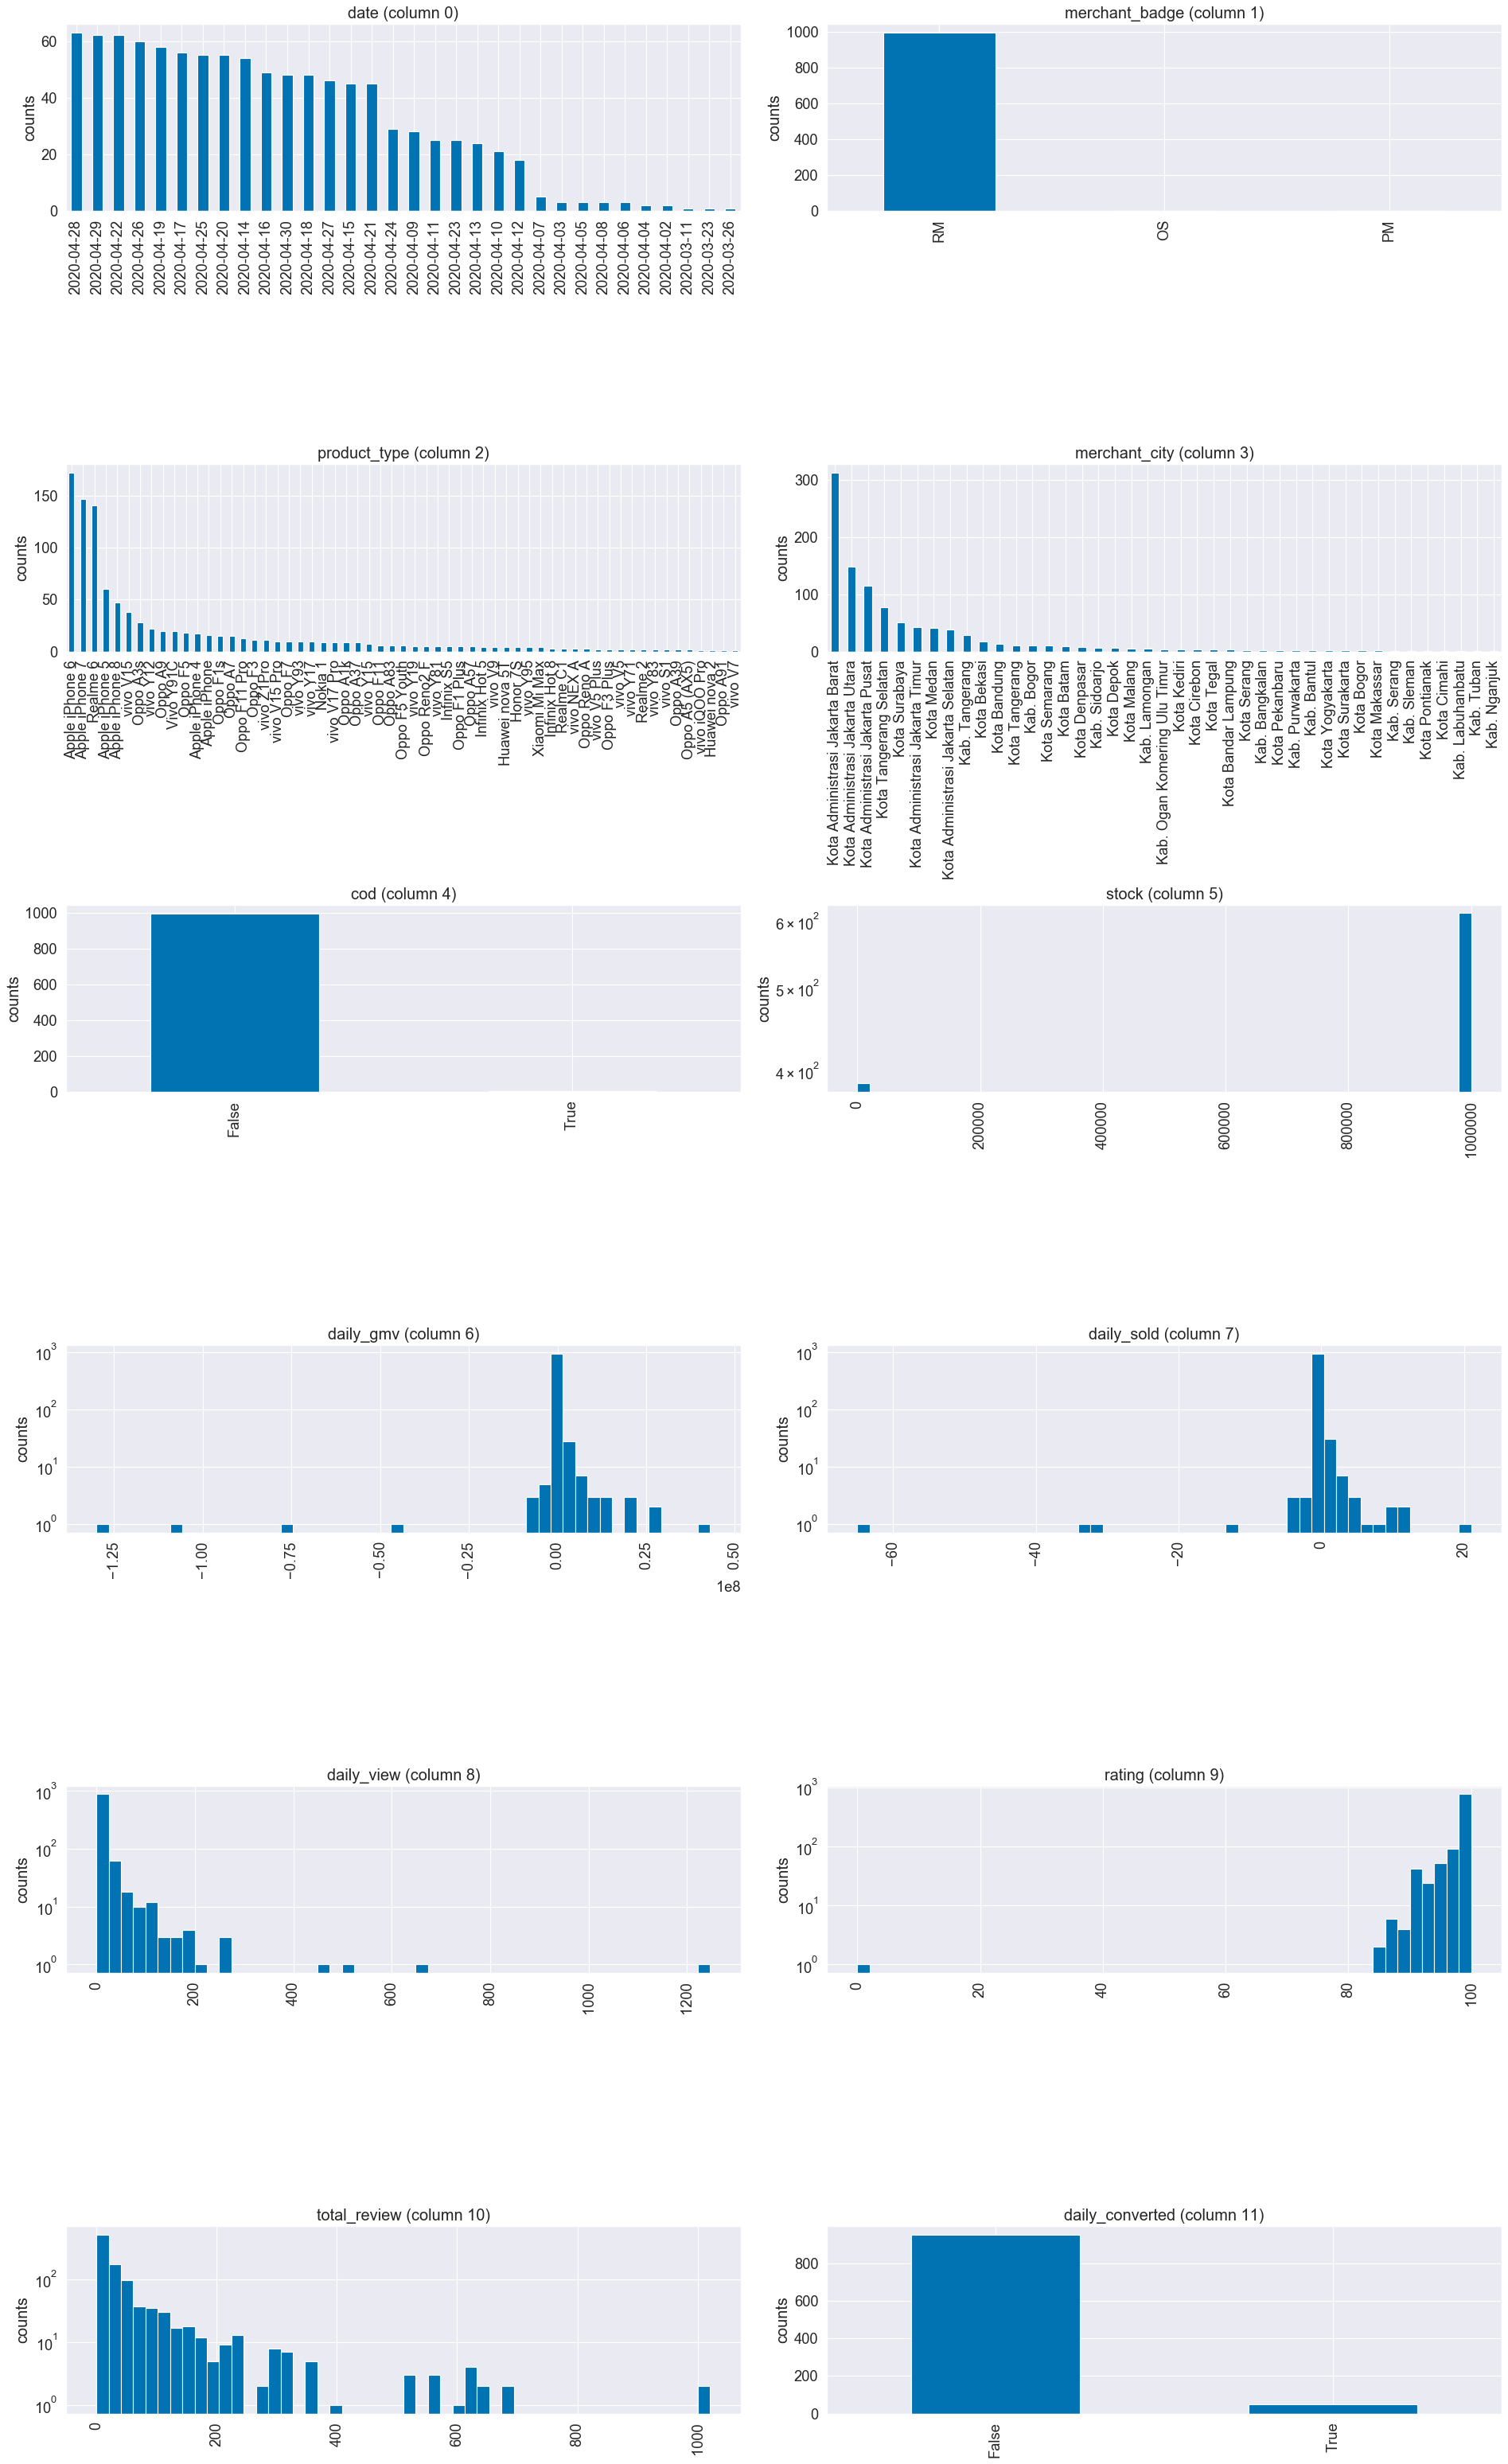

In [283]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    
    col_list = [col for col in df if df[col].nunique() > 1 and df[col].nunique() < 200] 
    df2 = df[col_list]
    #display(df2.head())
    print("The table has shape: {} rows and {} columns".format(*df2.shape))
    nRow, nCol = df2.shape
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (12 * nGraphPerRow, 6 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    
    print("max desired plots = {}, desired rows = {}".format(nGraphShown, nGraphPerRow))
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df2.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)): # bool, str (categorial data)
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else: #int64 data types
            columnDf.plot.hist(logy=True, bins=50)
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{col_list[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 0.5)
    plt.show()
    
plotPerColumnDistribution(df1, 20, 2)    

## Correlation
- There is a clear correlation between `daily_gmv` and `daily_sol`d as well as `total_review` and `total_sold`. The first correlation make sense as 

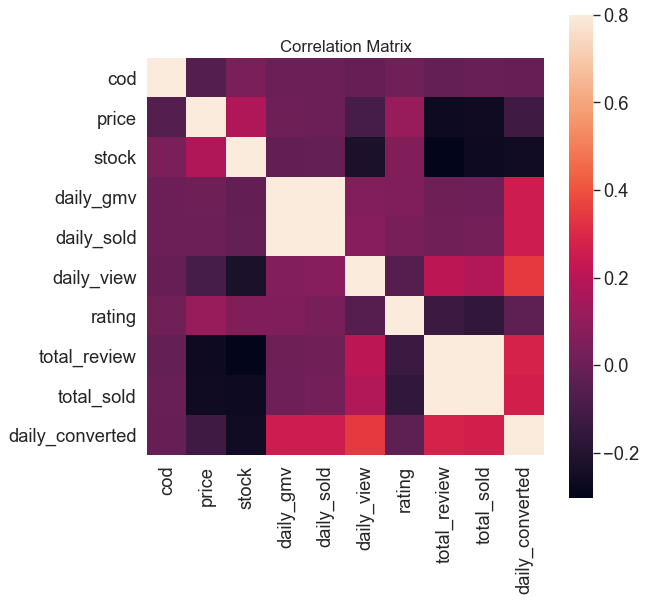

In [284]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN  
    
    # keep columns where there are more than 1 unique values
    col_list = [col for col in df if df[col].nunique() > 1]
    df = df[col_list] 
    
    # general check if there are atleast two columns to calculate the correlation
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    #corrMat = plt.matshow(corr, fignum = 1, vmax = .8)
    sns.heatmap(corr, vmax = .8, square = True)    
    #plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    #plt.yticks(range(len(corr.columns)), corr.columns)
    #plt.gca().xaxis.tick_bottom()
    #plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(df1, 8)   

These plots shows the same correlations as well as the density plots that shows data the trends. 

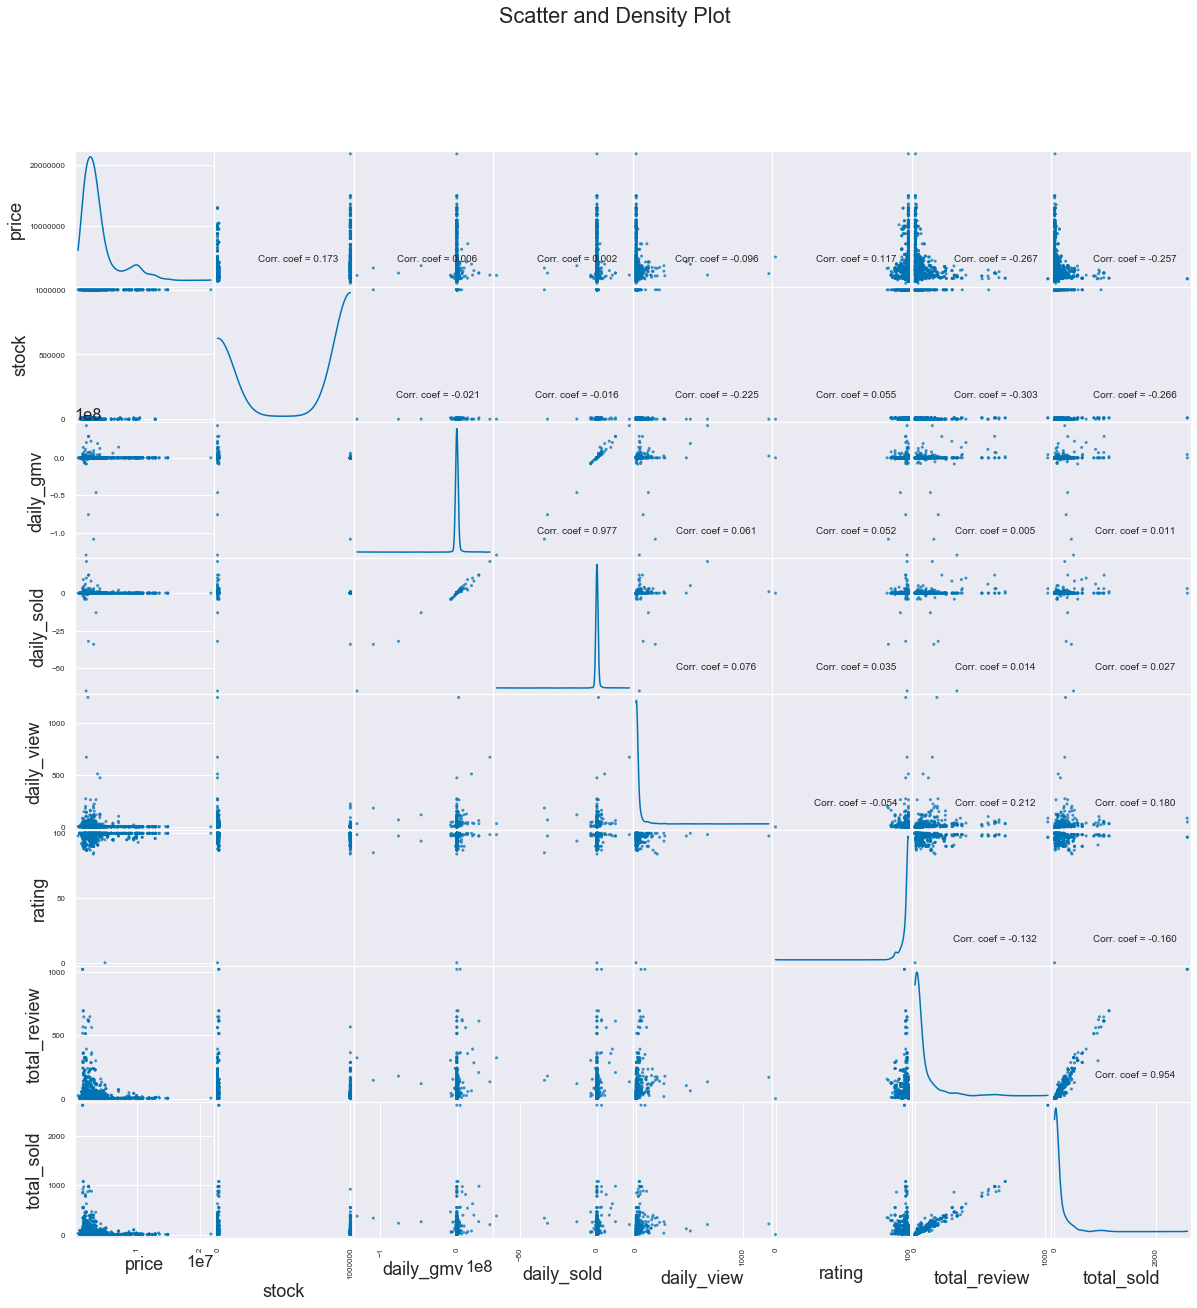

In [285]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns') # drop columns with NaN 
    
    # keep columns where there are more than 1 unique values
    col_list = [col for col in df if df[col].nunique() > 1] 
    df = df[col_list]
   
    # reduce the number of columns for matrix inversion of kernel density plots
    if len(col_list) > 10: 
        col_list = col_list[:10]
    df = df[col_list]
    
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.6, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(df1, 20, 10)

## Sort the products by Total Revenue

In [380]:
df_test=df1.groupby('product_type').daily_gmv.sum().sort_values(ascending=False)
display(df_test.head(10))

pTypeByMaxRev = df_test.index.values
display(pTypeByMaxRev)

product_type
Realme 6          116451200
Oppo F11           32688200
Vivo Y91C          23248500
Oppo A7            22549000
Oppo F11 Pro       19194000
Apple iPhone 8      6250000
Nokia 1             6040000
Oppo Reno2 F        4050999
vivo V15            3740000
Oppo A1k            3150000
Name: daily_gmv, dtype: int64

array(['Realme 6', 'Oppo F11', 'Vivo Y91C', 'Oppo A7', 'Oppo F11 Pro',
       'Apple iPhone 8', 'Nokia 1', 'Oppo Reno2 F', 'vivo V15',
       'Oppo A1k', 'vivo Z1Pro', 'Oppo A3s', 'vivo Y15', 'Infinix S5',
       'Oppo A57', 'Oppo A83', 'Oppo A91', 'Oppo F1 Plus',
       'Oppo A5 (AX5)', 'vivo iQOO Pro', 'Oppo A39', 'Oppo F1s',
       'Infinix Hot 8', 'Infinix Hot 5', 'Huawei nova 5T',
       'Huawei nova 2', 'Honor 7S', 'Apple iPhone 7', 'Apple iPhone 6',
       'Apple iPhone 5', 'Apple iPhone 4', 'Oppo A37', 'Oppo F5',
       'Oppo F3', 'vivo V17 Pro', 'vivo Y93', 'vivo Y83', 'vivo Y81',
       'vivo Y71', 'vivo Y19', 'vivo V9', 'vivo V7', 'vivo V5 Plus',
       'Oppo F3 Plus', 'vivo V5', 'vivo V15 Pro', 'vivo S1', 'vivo NEX A',
       'Xiaomi Mi Max', 'Realme C1', 'Realme 2', 'Oppo Reno A', 'Oppo F7',
       'Oppo F5 Youth', 'Apple iPhone', 'vivo Y95', 'vivo Y17',
       'vivo Y12', 'Oppo A9'], dtype=object)

In [168]:
cityByMaxRev = df1.groupby('merchant_city').daily_gmv.sum().sort_values(ascending=False).index.values
print(cityByMaxRev)

['Kota Administrasi Jakarta Utara' 'Kota Administrasi Jakarta Pusat'
 'Kota Batam' 'Kota Surabaya' 'Kab. Sidoarjo' 'Kota Bandar Lampung'
 'Kota Administrasi Jakarta Timur' 'Kota Administrasi Jakarta Selatan'
 'Kab. Tuban' 'Kab. Sleman' 'Kab. Serang' 'Kota Tegal' 'Kab. Purwakarta'
 'Kab. Ogan Komering Ulu Timur' 'Kab. Nganjuk' 'Kab. Lamongan'
 'Kab. Labuhanbatu' 'Kab. Bogor' 'Kab. Bantul' 'Kota Bandung'
 'Kota Yogyakarta' 'Kota Bekasi' 'Kota Bogor' 'Kota Tangerang'
 'Kota Surakarta' 'Kota Serang' 'Kota Semarang' 'Kota Pontianak'
 'Kota Pekanbaru' 'Kota Medan' 'Kota Malang' 'Kota Makassar' 'Kota Kediri'
 'Kota Depok' 'Kota Denpasar' 'Kota Cirebon' 'Kota Cimahi'
 'Kab. Bangkalan' 'Kab. Tangerang' 'Kota Administrasi Jakarta Barat'
 'Kota Tangerang Selatan']


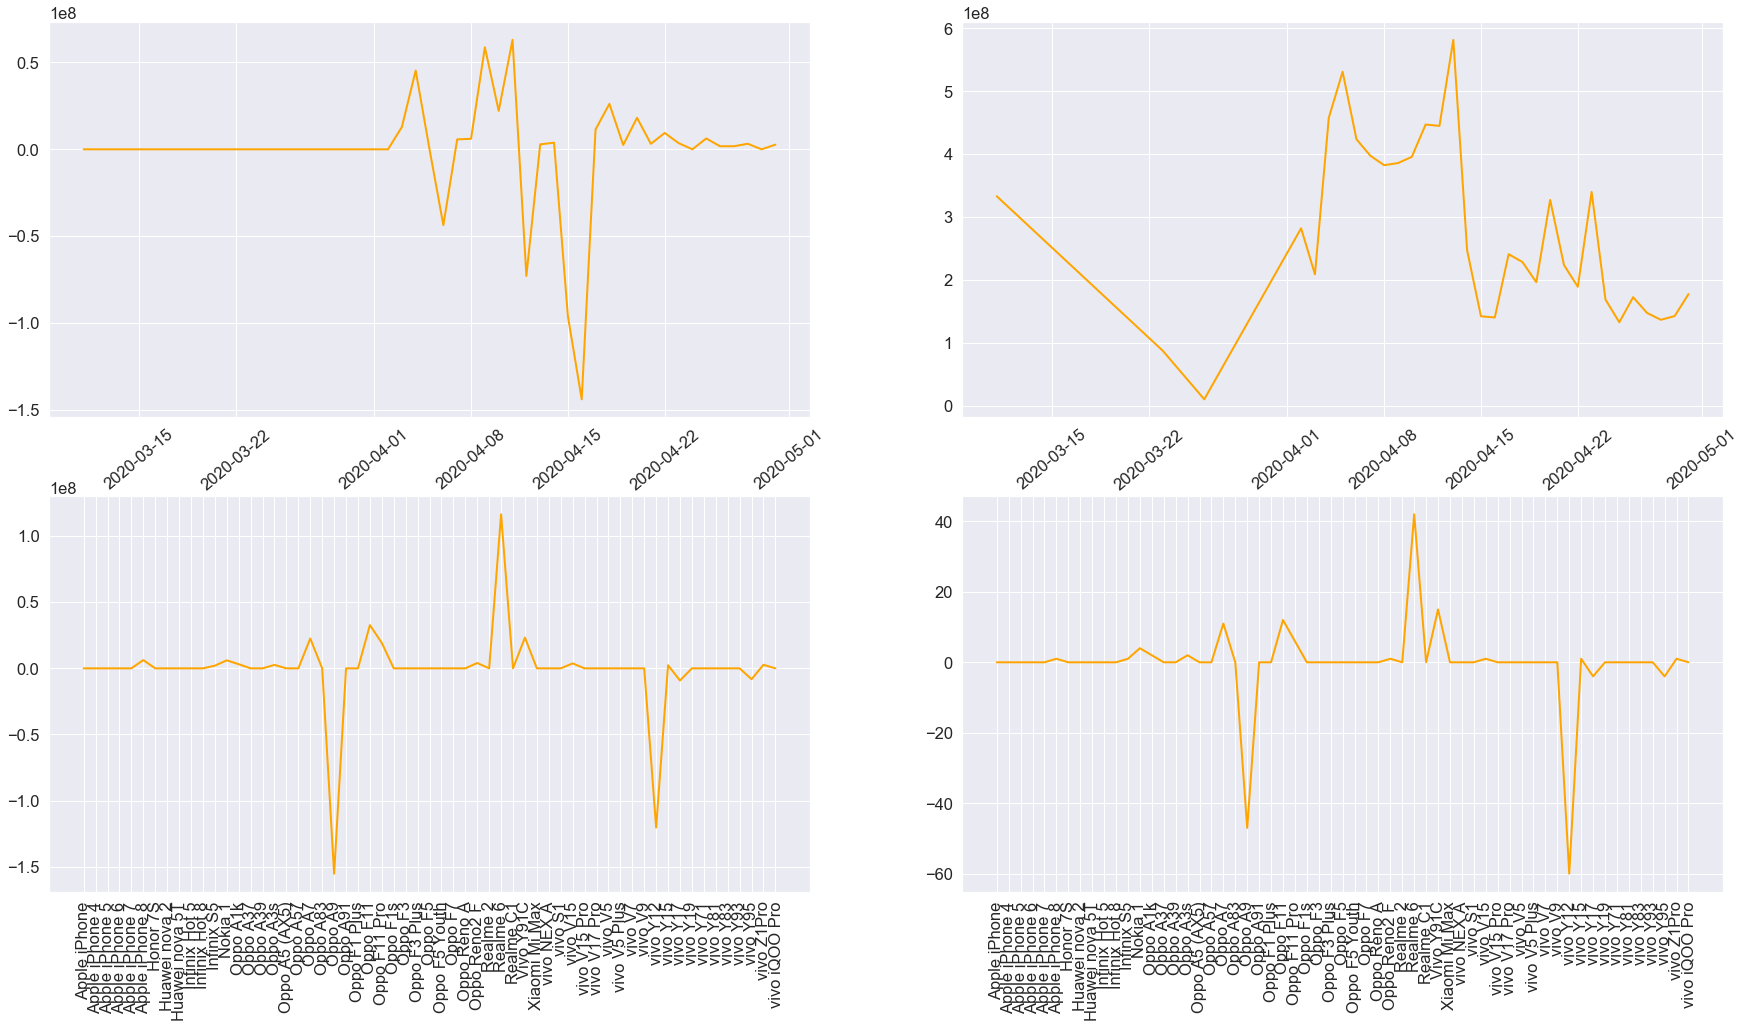

In [383]:
#pTypeByStock = df1.groupby('product_type').stock.sum().sort_values(ascending=False).index.values
fig,((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(30, 16))

gb1 = df1.groupby(['date'], as_index=True).agg({'daily_gmv':'sum'})
gb2 = df1.groupby(['date'], as_index=True).agg({'total_gmv':'mean'})

#date_list = gb1.reset_index()["date"].tolist()
#x_ticks = [dt.datetime.strftime(t,'%Y-%m-%d') for t in date_list]
#print(date_list)
#x_ticks = [tick for i,tick in enumerate(x_ticks) if i%8==0 ]# split labels into same number of ticks as by pandas
    #ax1.set_xticklabels(x_ticks, rotation=90)
    

gb3 = df1.groupby(['product_type'], as_index=True).agg({'daily_gmv':'sum'})
gb4 = df1.groupby(['product_type'], as_index=True).agg({'daily_sold':'sum'})

#product_list = gb3.reset_index()["product_type"].tolist()
#print(product_list)

#gb3 = df1.groupby(['date'], as_index=False).agg({'price':'min'})
#gb4 = df1.groupby(['date'], as_index=False).agg({'price':'max'})
gb5 = df1.groupby(['date'], as_index=False).agg({'rating':'max'})

ax0.plot(gb1['daily_gmv'], lw=2, color='orange', label="revenue")
#ax0.set_xticklabels(date_list, rotation=90)
ax0.tick_params(axis='x', rotation=40)
ax1.plot(gb2['total_gmv'], lw=2, color='orange', label="sales")
#ax1.set_xticklabels(date_list, rotation=90)
ax1.tick_params(axis='x', rotation=40)

ax2.plot(gb3['daily_gmv'], lw=2, color='orange', label="revenue")
#ax2.set_xticklabels(product_list, rotation=90)
ax2.tick_params(axis='x', rotation=90)

ax3.plot(gb4['daily_sold'], lw=2, color='orange', label="sales")
#ax3.set_xticklabels(product_list, rotation=90)
ax3.tick_params(axis='x', rotation=90)

#ax3.plot(gb5['rating'], lw=2, color='orange', label="revenue")






<Figure size 720x360 with 0 Axes>

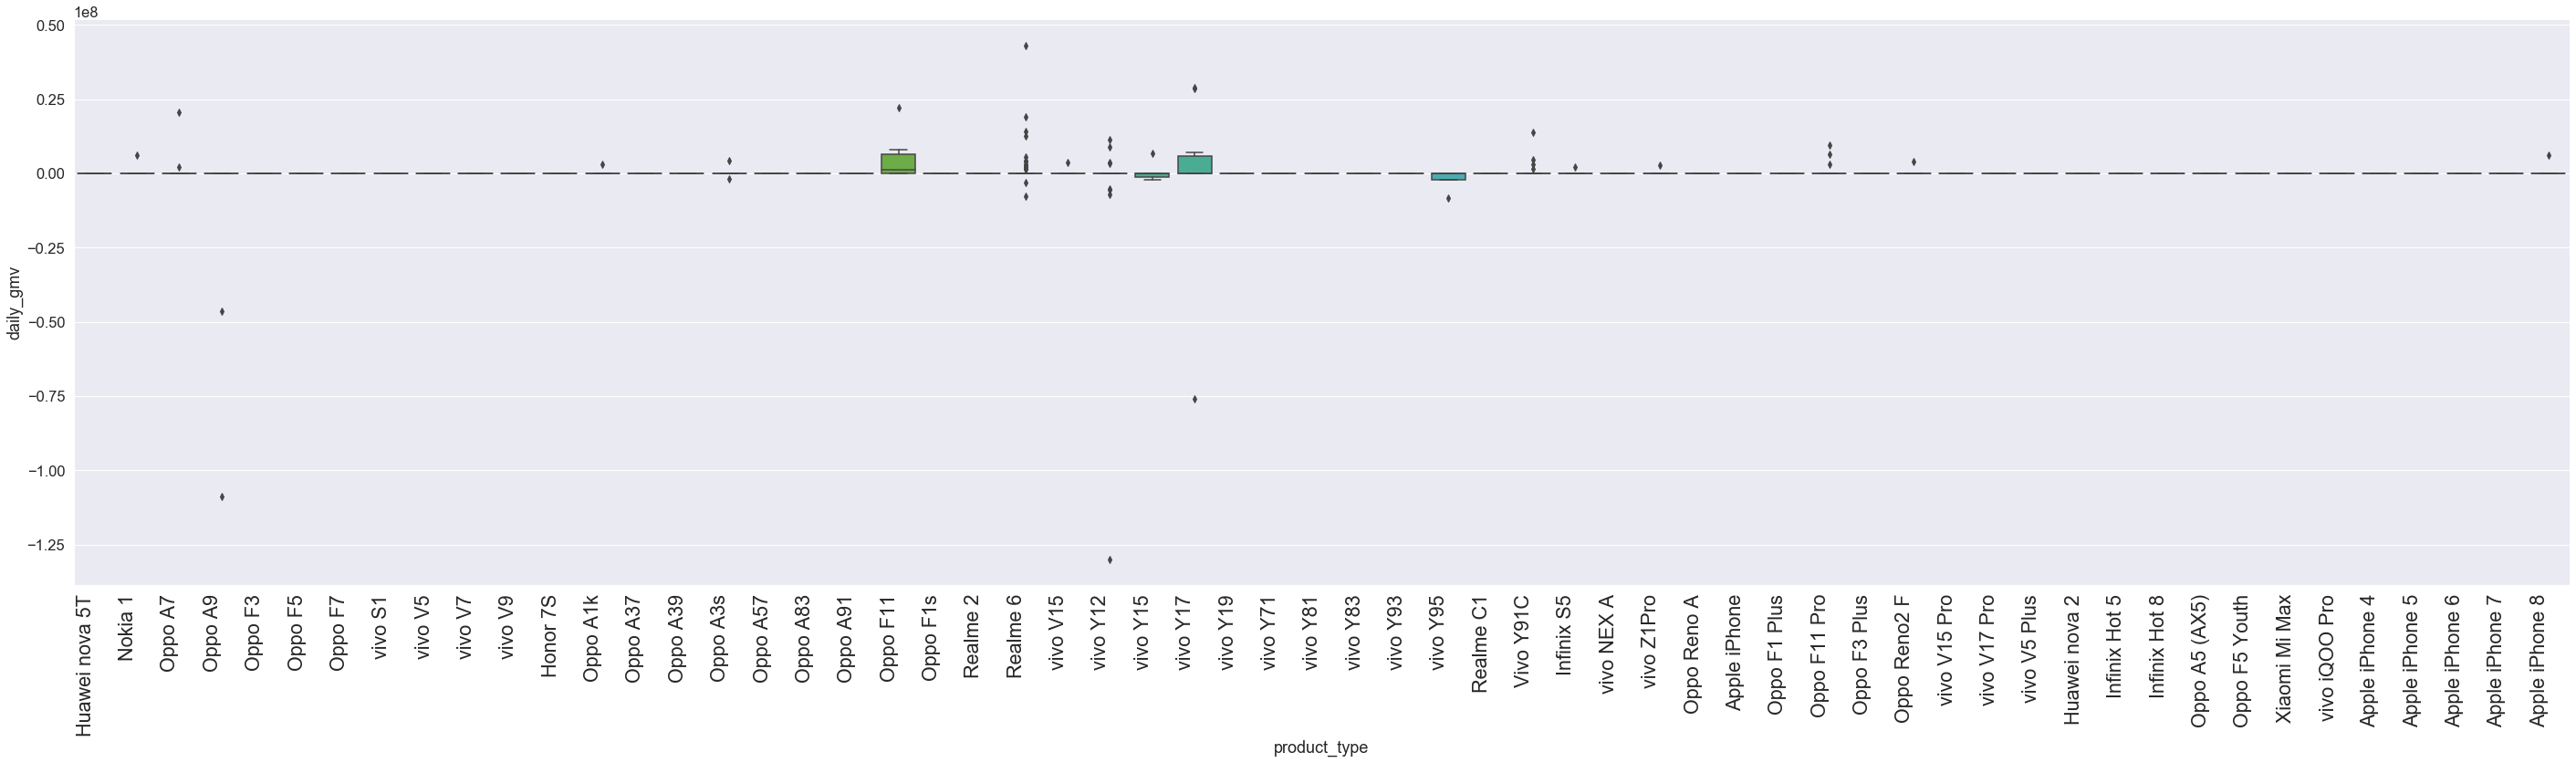

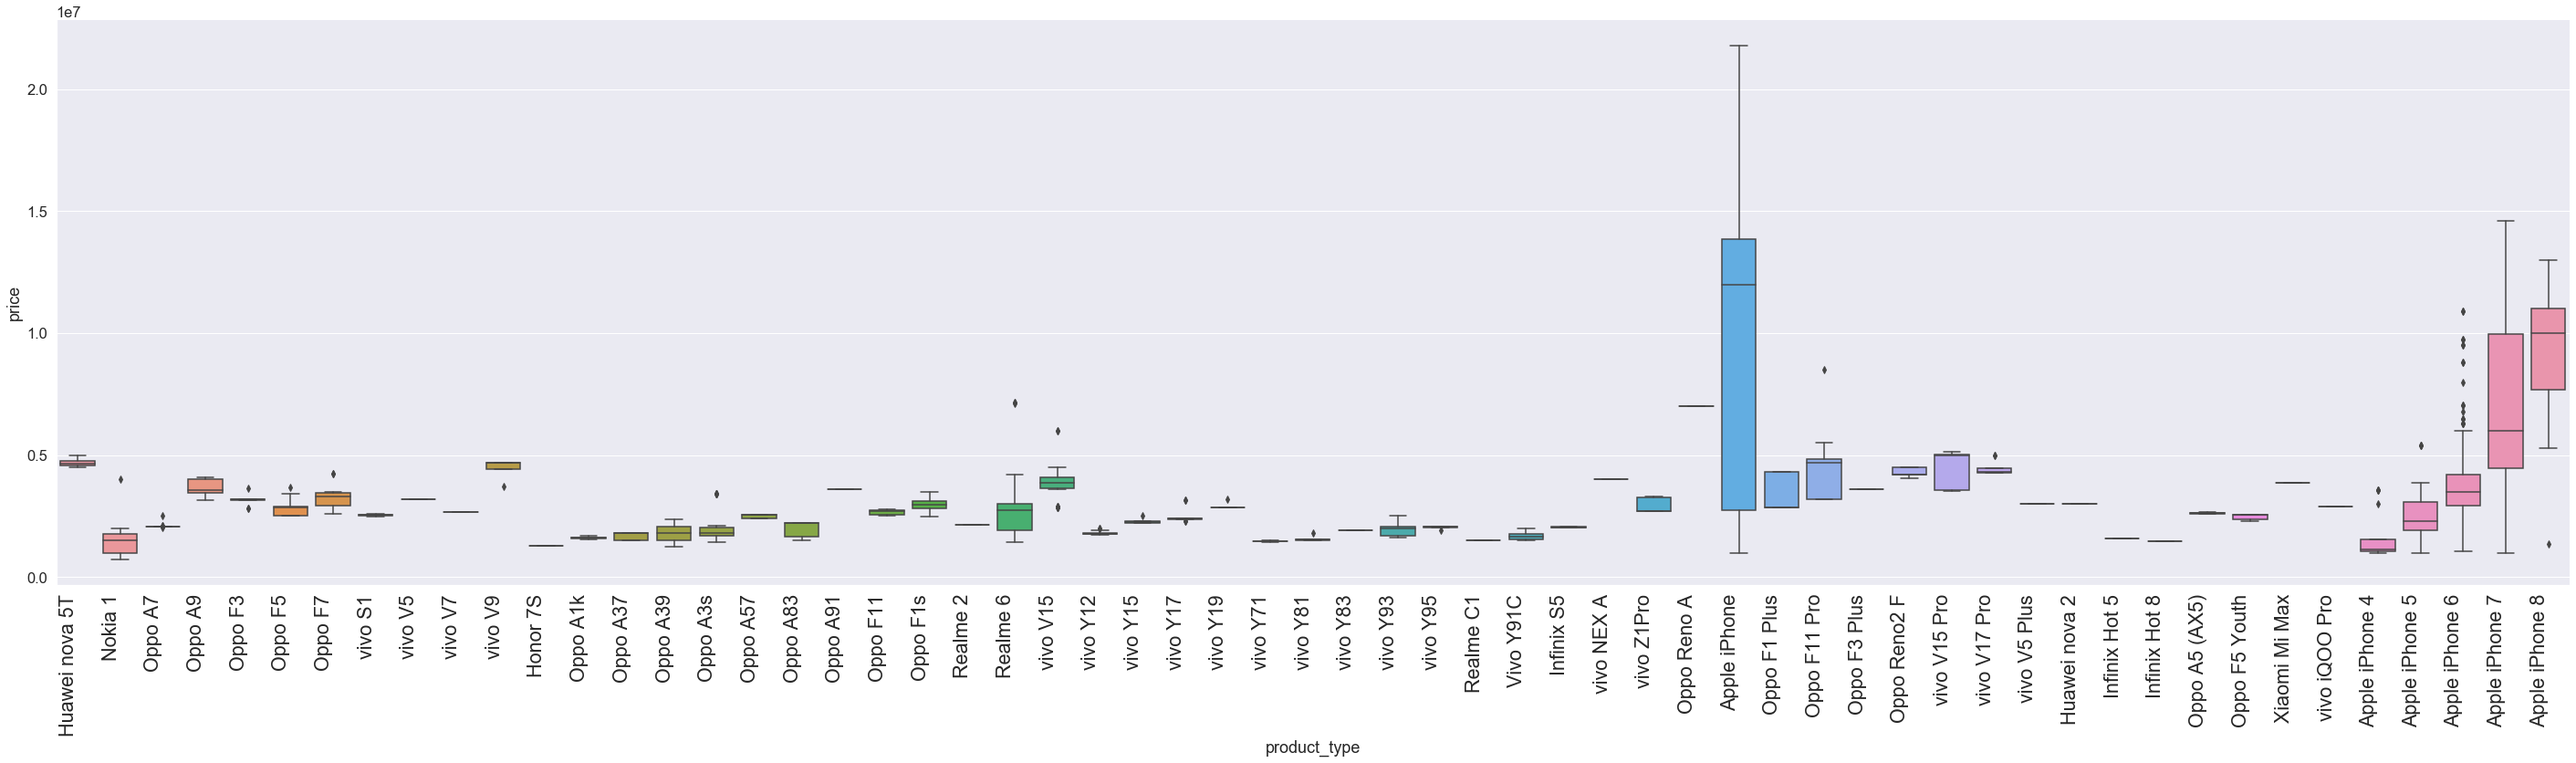

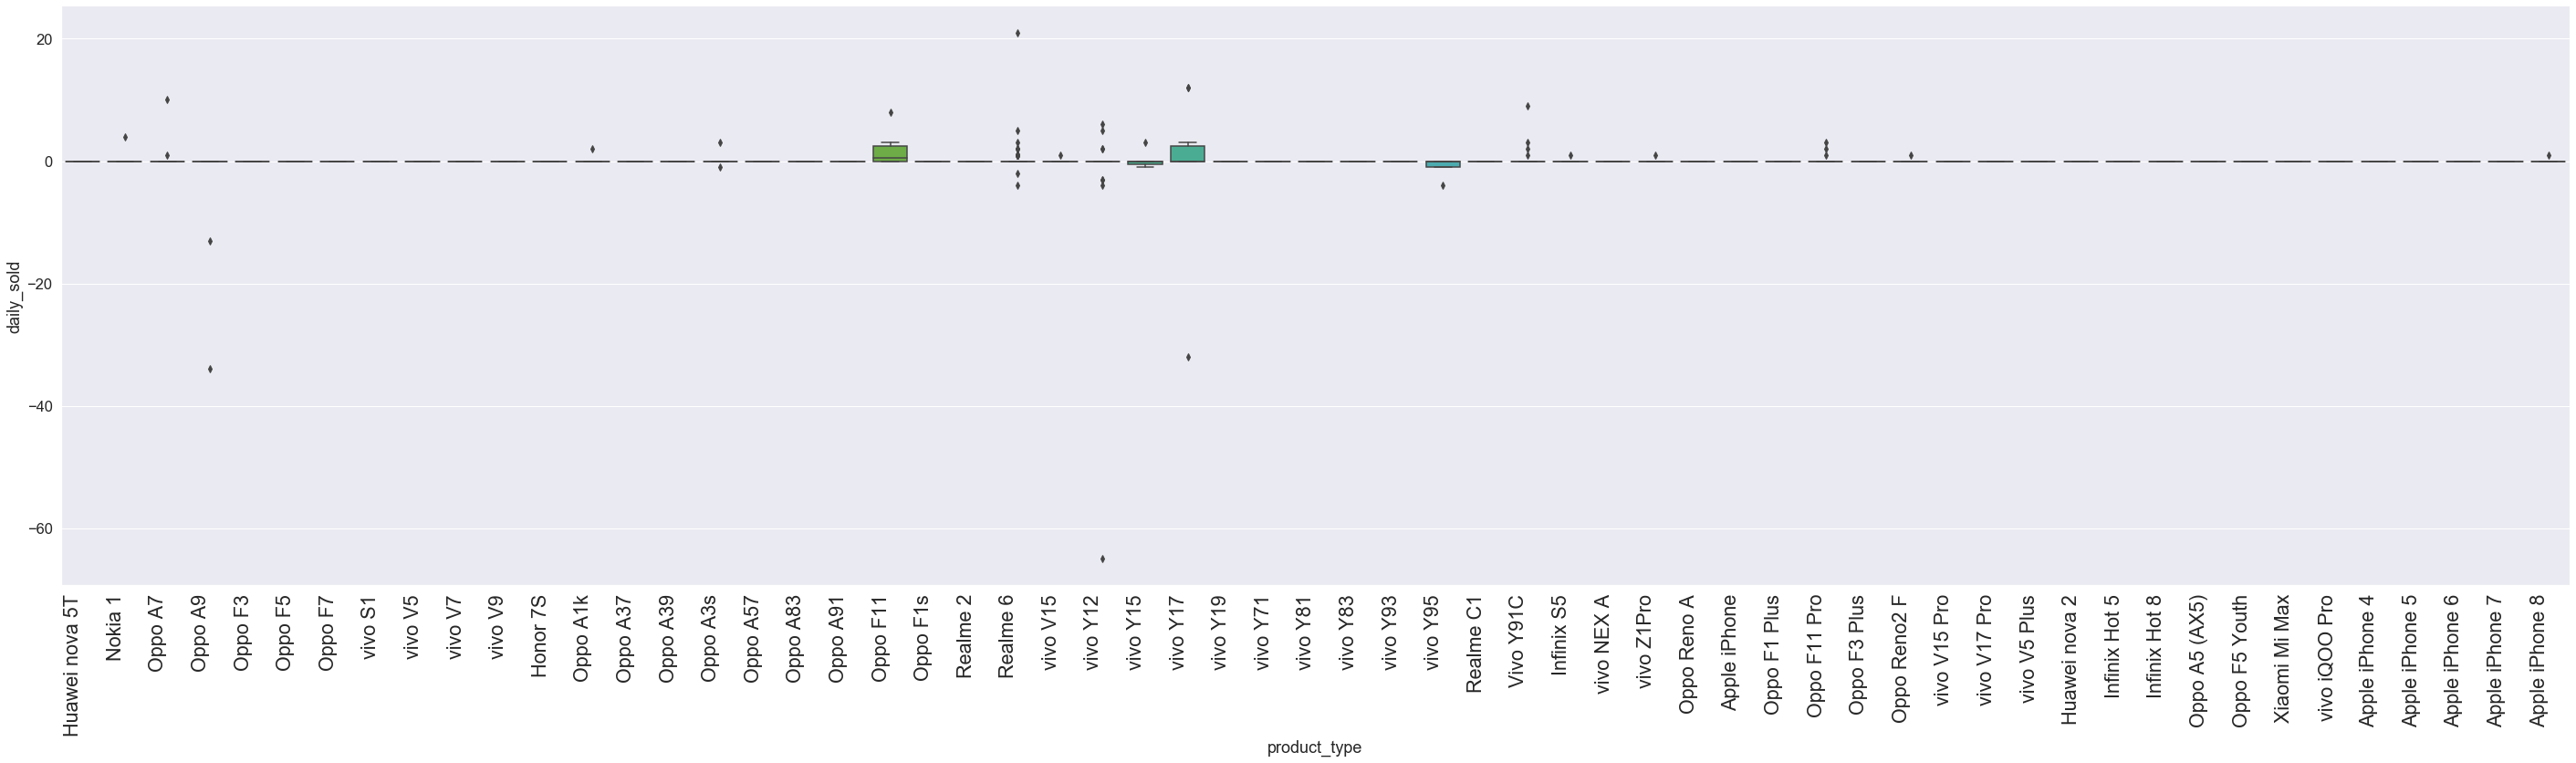

In [358]:
def catPlot(x_var, y_var, k, h, a):
    catplot = sns.catplot(x=x_var, y=y_var, 
                #data=df1[(df1.daily_converted == True)],
                data=df1,          
                kind=k,
                height=h, aspect=a)
    plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
    )
    return catplot

plt.figure(figsize=(10,5))
catPlot('product_type', 'daily_gmv', 'box', 10, 4)
catPlot('product_type', 'price', 'box', 10, 4)
catPlot('product_type', 'daily_sold', 'box', 10, 4)

['Realme 6' 'Oppo F11' 'Vivo Y91C' 'Oppo A7' 'Oppo F11 Pro'
 'Apple iPhone 8' 'Nokia 1' 'Oppo Reno2 F' 'vivo V15' 'Oppo A1k'
 'vivo Z1Pro' 'Oppo A3s' 'vivo Y15' 'Infinix S5' 'Oppo A57' 'Oppo A83'
 'Oppo A91' 'Oppo F1 Plus' 'Oppo A5 (AX5)' 'vivo iQOO Pro' 'Oppo A39'
 'Oppo F1s' 'Infinix Hot 8' 'Infinix Hot 5' 'Huawei nova 5T'
 'Huawei nova 2' 'Honor 7S' 'Apple iPhone 7' 'Apple iPhone 6'
 'Apple iPhone 5' 'Apple iPhone 4' 'Oppo A37' 'Oppo F5' 'Oppo F3'
 'vivo V17 Pro' 'vivo Y93' 'vivo Y83' 'vivo Y81' 'vivo Y71' 'vivo Y19'
 'vivo V9' 'vivo V7' 'vivo V5 Plus' 'Oppo F3 Plus' 'vivo V5'
 'vivo V15 Pro' 'vivo S1' 'vivo NEX A' 'Xiaomi Mi Max' 'Realme C1'
 'Realme 2' 'Oppo Reno A' 'Oppo F7' 'Oppo F5 Youth' 'Apple iPhone'
 'vivo Y95' 'vivo Y17' 'vivo Y12' 'Oppo A9']


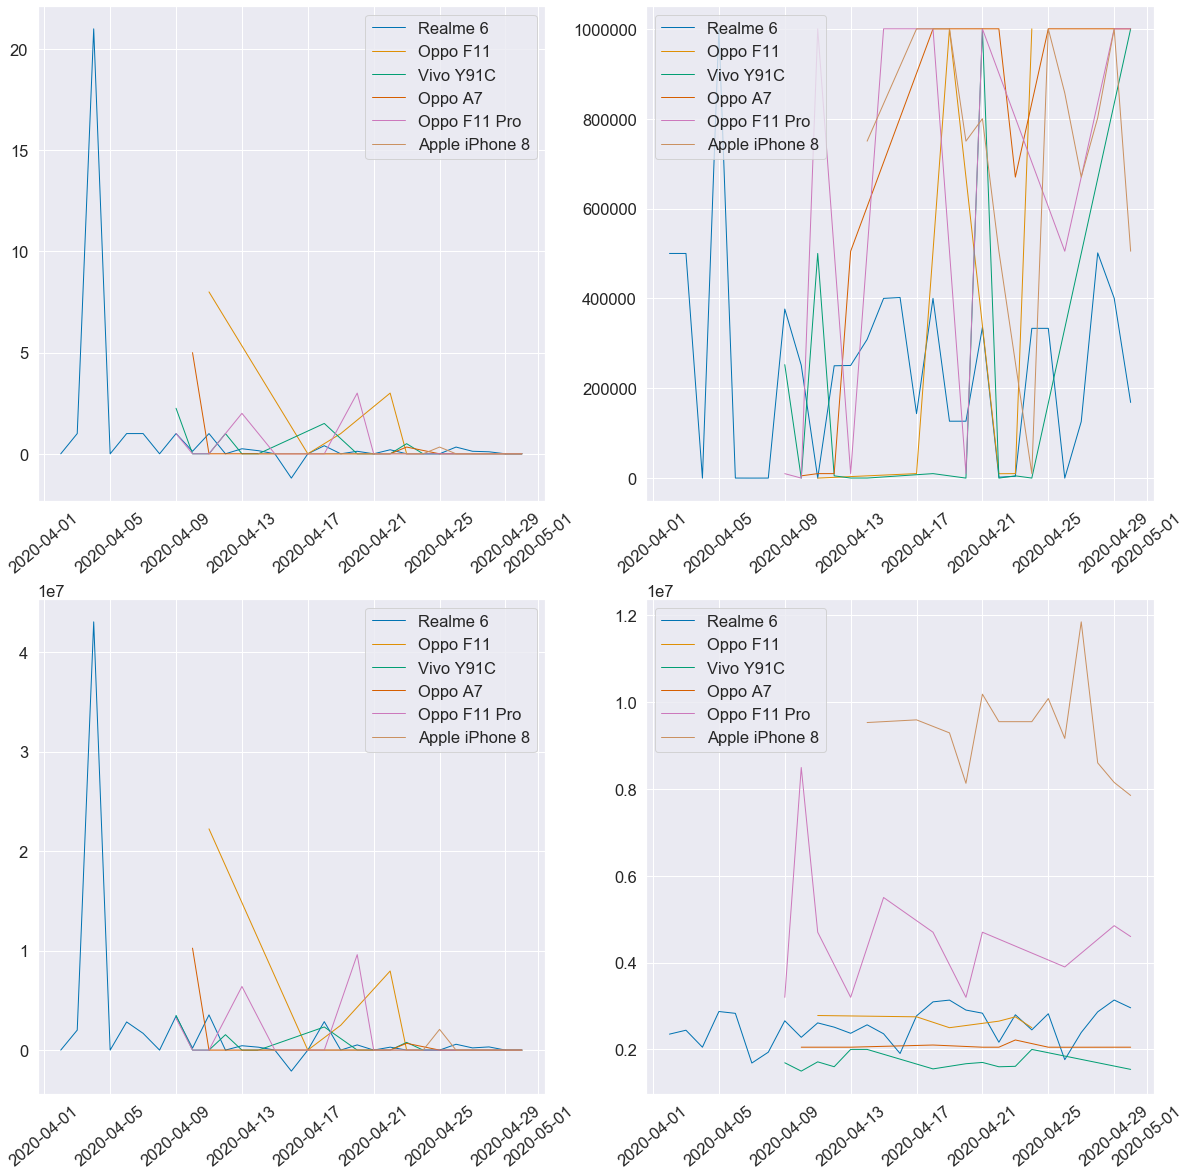

In [333]:
#pTypeByMaxRev = df1.query('(daily_sold < 0)').groupby('product_type').daily_revenue.sum().sort_values(ascending=False).index.values
pTypeByMaxRev = df1.groupby('product_type').daily_gmv.sum().sort_values(ascending=False).index.values
print(pTypeByMaxRev)


fig,((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(20, 20))

for p in pTypeByMaxRev[:6]:
    #df_temp = df1.query('(daily_converted==True) & (product_type==@c)').groupby(['date']).total_sold.nunique()
    df_1 = df1.query('(product_type==@p)').groupby(['date']).daily_sold.mean()
    ax0.plot(df_1.index, df_1.values, lw=1, label=p) 
    #ax0.hist(df1.date[(df1.product_type==p)].dropna(), bins=100, histtype='step', density=False, label=p)
    #df_1 = df1.query('(product_type==@p)').sort_values('date', ascending=False)
    #df_1.dropna(subset=["date"], inplace=True)
    #ax0.hist(df_1.date, bins=30, histtype="step", label=p, density=True)
    #ax0.xaxis.set_major_locator(dates.DayLocator())
    #ax0.xaxis.set_major_formatter(dates.DateFormatter('%b %d')) 
    #ax0.set_xticklabels(x_ticks, rotation=90)
    ax0.tick_params(axis='x', rotation=40)
    #ax0.legend(loc='best')
ax0.legend()

for p in pTypeByMaxRev[:6]:
    #df_temp = df1.query('(daily_converted==True) & (product_type==@c)').groupby(['date']).stock.count()
    df_4 = df1.query('(product_type==@p)').groupby(['date']).stock.mean()
    ax1.plot(df_4.index, df_4.values, lw=1, label=p) 
    ax1.tick_params(axis='x', rotation=40)
ax1.legend()

for c in pTypeByMaxRev[:6]:
    df_2 = df1.query('(product_type==@c)').groupby(['date']).daily_gmv.mean()  
    #df_2 = df1.query('(product_type==@c)').groupby(['date']).price.min()
    ax2.plot(df_2.index, df_2.values, lw=1, label=c) 
    #date_list = df1.reset_index()["date"].tolist()
    #x_ticks = [dt.datetime.strftime(t,'%Y-%m-%d') for t in date_list]
    #x_ticks = [tick for i,tick in enumerate(x_ticks) if i%8==0 ]# split labels into same number of ticks as by pandas
    #ax1.set_xticklabels(x_ticks, rotation=90)
    ax2.tick_params(axis='x', rotation=40)  
ax2.legend()

for p in pTypeByMaxRev[:6]:
    #df_temp = df1.query('(daily_converted==True) & (product_type==@c)').groupby(['date']).total_sold.nunique()
    df_3 = df1.query('(product_type==@p)').groupby(['date']).price.mean()
    ax3.plot(df_3.index, df_3.values, lw=1, label=p) 
    ax3.tick_params(axis='x', rotation=40)
ax3.legend()


['Realme 6' 'Oppo F11' 'Vivo Y91C' 'Oppo A7' 'Oppo F11 Pro'
 'Apple iPhone 8']


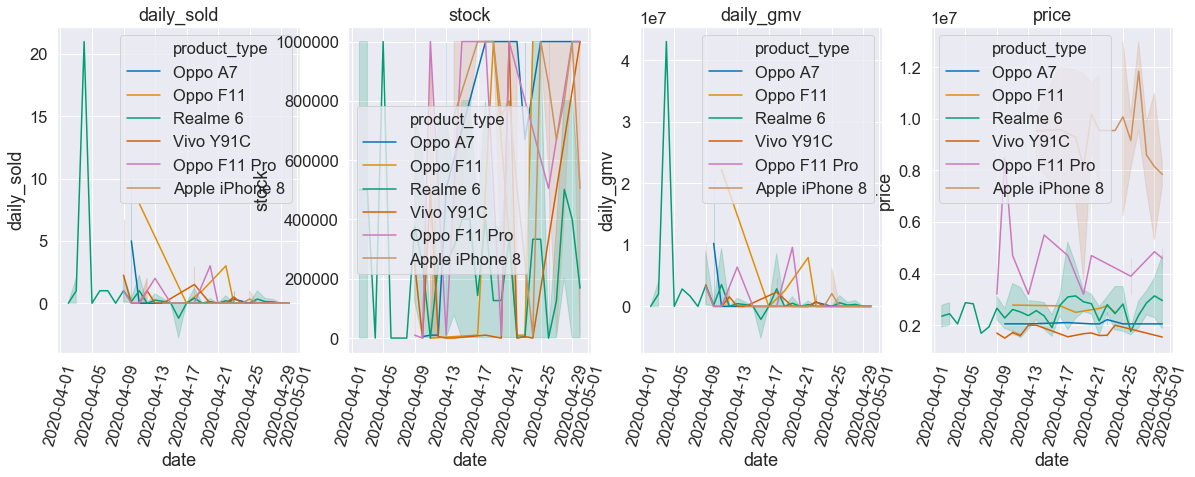

In [346]:
maxlist=pTypeByMaxRev[:6]
print (maxlist)

df_mini = df1[(df1.product_type==maxlist[0]) | (df1.product_type==maxlist[1]) | (df1.product_type==maxlist[2])|
              (df1.product_type==maxlist[3]) | (df1.product_type==maxlist[4]) | (df1.product_type==maxlist[5])
             ]

cols = ["daily_sold", "stock","daily_gmv", "price"]

fig, axs = plt.subplots(1, len(cols), figsize=(20,6))
for col, ax in  zip(cols, axs):
   sns.lineplot(x=df_mini["date"], y=df_mini[col], data=df_mini, hue="product_type", ax=ax)
   ax.tick_params(axis='x', rotation=75)
   ax.set_title(col) 